<a href="https://colab.research.google.com/github/mnrazamohamed/Deep-learning-for-Structured-and-Unstructured-Data/blob/main/DL_Deep_learning_for_Structured_and_Unstructured_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning for Structured and Unstructured Data

Name: Raza Mohamed

Student ID: 24148501


This project focuses on developing and optimizing a deep neural network (DNN) model for classifying images from the FashionMNIST dataset using TensorFlow and Keras. The objective is to accurately recognize clothing items such as T-shirts, trousers, dresses, sneakers, and more, across 10 predefined categories.

The workflow includes the following key components:

1. **Data Preprocessing**:  
   The FashionMNIST dataset is loaded, reshaped, and normalized to scale pixel values between 0 and 1. An additional channel dimension is added to support convolutional layers, and exploratory steps are taken to confirm the shape and label distributions.

2. **Model Design**:  
   A custom DNN architecture is implemented using Keras Sequential API. The model includes multiple dense layers with activation functions and batch normalization. A custom F1 score function is defined to evaluate the model's performance more reliably than accuracy alone. This section demonstrates strong understanding of deep learning model structure.

3. **Dropout and Regularization**:  
   Dropout layers are applied after hidden layers to reduce overfitting. Additionally, L2 regularization is included in dense layers to penalize overly complex models, promoting generalization.

4. **Augmentation**:  
   Image augmentation techniques are defined using Keras' ImageDataGenerator, which includes random rotations, shifts, and horizontal flipping. This helps the model learn robust patterns by simulating real-world variations in image data.

5. **Hyperparameter Optimization**:  
   Optuna is used to automate the tuning of learning rate, dropout rate, layer sizes, and regularization strength. The objective function is optimized to maximize the validation F1 score. This demonstrates the integration of AutoML strategies into the modeling pipeline.

6. **Model Evaluation**:  
   The final model is evaluated using accuracy, precision, recall, F1 score, and a confusion matrix. Results are clearly visualized through training and validation loss and metric plots. These insights help assess both learning progress and generalization.

7. **Results and Model Saving**:  
   Model performance scores are saved into a CSV file, and the best model is exported as an .h5 file. This enables easy reuse and deployment of the trained network.

Overall, the project provides a comprehensive approach to image classification using DNNs. It integrates key deep learning techniques such as **model design**, **dropout**, **regularization**, **augmentation**, and **hyperparameter optimization**, resulting in a robust solution for the FashionMNIST classification task.



## Mount Google Drive  
The google.colab library is used to mount Google Drive to the Colab environment. This allows access to files stored in Google Drive by mounting it at /content/drive. After running the code, a prompt will appear to authorize access to Google Drive.


In [ ]:
# Mount Google Drive to access stored files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Imports  
The necessary libraries and modules are imported for the project. Keras is used for building and training the neural network. The Fashion MNIST dataset is imported to use for training and testing the model. Various layers like Dense and the Sequential model are also imported from Keras to construct and define the neural network architecture.


In [ ]:
# Imports
import keras
from keras.datasets import fashion_mnist
from keras import layers
from keras import Sequential
from keras.layers import Dense

## Load in the data  
The Fashion MNIST dataset is loaded using the fashion_mnist.load_data() function. This function splits the data into training and testing sets, storing the images in x_train and x_test, and the corresponding labels in y_train and y_test.


In [ ]:
# load in the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Make sure that the data is all the right shape  
Assertions are used to verify that the data has the correct shape. The training images (x_train) should have a shape of (60000, 28, 28), and the test images (x_test) should have a shape of (10000, 28, 28). The corresponding labels (y_train and y_test) should have a shape of (60000,) and (10000,) respectively.


In [ ]:
# make sure that the data is all the right shape
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


## Visualize a few sample images with their labels  
The necessary libraries such as numpy, matplotlib, seaborn, and pandas are imported. The label names for the Fashion MNIST dataset are defined in a dictionary. The code then visualizes a few sample images from the training dataset (x_train) with their corresponding labels. A grid of 3x3 subplots is created using plt.subplots(), where each image is displayed with its label as the title. The axis of each subplot is turned off for a cleaner visualization.


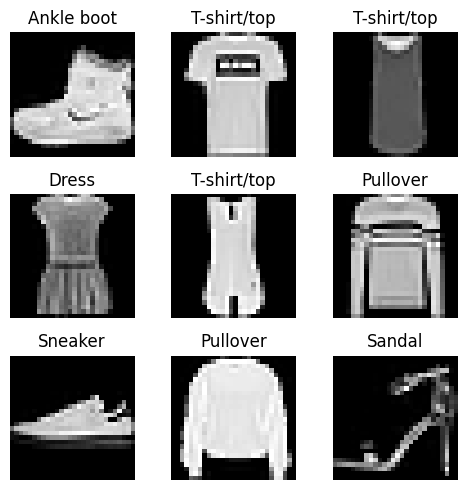

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define label names for FashionMNIST
label_names = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
}


# 1. Visualize a few sample images with their labels
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"{label_names[y_train[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


## Plot the distribution of labels in the training set  
The distribution of labels in the training data (y_train) is plotted using a bar chart. First, the count of each label is calculated using value_counts() and sorted by the index. The bar chart is created with the sns.barplot() function, where the x-axis represents the fashion items, and the y-axis represents the count of each item. The chart is titled and labeled for clarity.


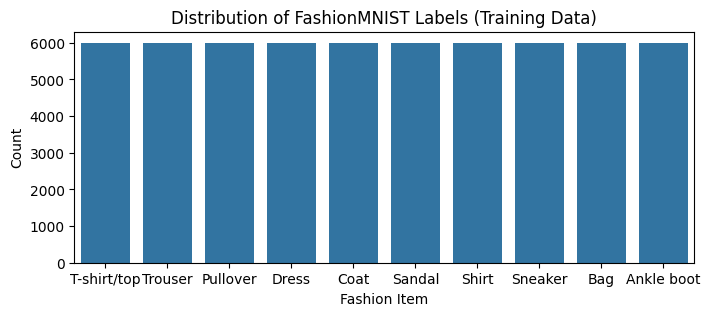

In [ ]:
# 2. Plot the distribution of labels in the training set
label_counts = pd.Series(y_train).value_counts().sort_index()
plt.figure(figsize=(8, 3))
sns.barplot(x=label_counts.index.map(lambda x: label_names[x]), y=label_counts.values)
plt.xlabel("Fashion Item")
plt.ylabel("Count")
plt.title("Distribution of FashionMNIST Labels (Training Data)")
plt.show()

## Normalize and reshape the data  
The training and test data (x_train and x_test) are reshaped to a 2D array of size (28*28), which represents each image as a flattened vector. Additionally, the pixel values are normalized by dividing them by 255.0 and converting them to float32 data type to scale the pixel values between 0 and 1 for better model training performance.


In [ ]:
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

## Normalize pixel values  
This code normalizes the pixel values of the training (x_train) and testing (x_test) datasets by dividing the pixel values by 255. This step ensures that the values are scaled to the range [0, 1], which helps the model converge faster and improves training stability. The pixel values are also converted to the float32 data type for better precision during model training.


In [ ]:
# Requires longer runtime (Colab limit).

# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

## Reshape input data  
This code reshapes the x_train and x_test datasets by adding a new axis using np.newaxis. This step adjusts the shape of the data from (60000, 28, 28) and (10000, 28, 28) to (60000, 28, 28, 1) and (10000, 28, 28, 1), respectively. The additional dimension is required to represent the number of channels in the images (in this case, 1 channel for grayscale images) for compatibility with convolutional neural networks (CNNs).


In [ ]:
# Requires longer runtime (Colab limit).

# x_train = x_train[..., np.newaxis]  # Shape: (60000, 28, 28, 1)
# x_test = x_test[..., np.newaxis]    # Shape: (10000, 28, 28, 1)

## Image Augmentation  
The ImageDataGenerator from tensorflow.keras.preprocessing.image is used to define various image augmentation parameters. Augmentation is applied to the training images to improve model generalization and prevent overfitting.

- **rotation_range=10**: Randomly rotates images by up to 10 degrees.
- **width_shift_range=0.1**: Randomly shifts images horizontally by up to 10% of the image width.
- **height_shift_range=0.1**: Randomly shifts images vertically by up to 10% of the image height.
- **horizontal_flip=True**: Randomly flips images horizontally.
- **fill_mode='nearest'**: Fills in newly created pixels with the nearest available pixel value.

After defining the augmentation parameters, the generator is fitted to the training data (x_train) to prepare for real-time augmentation during model training.


In [ ]:
# Requires longer runtime (Colab limit).

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define augmentation parameters
# datagen = ImageDataGenerator(
#     rotation_range=10,         # Randomly rotate images by up to 10 degrees
#     width_shift_range=0.1,     # Randomly shift images horizontally by up to 10% of width
#     height_shift_range=0.1,    # Randomly shift images vertically by up to 10% of height
#     horizontal_flip=True,      # Randomly flip images horizontally
#     fill_mode='nearest'        # Fill in new pixels with the nearest value
# )

# # Fit the generator to the training data
# datagen.fit(x_train)

## Initialize dictionaries to store models and scores  
Two dictionaries, models and model_scores, are initialized to store the models and their corresponding scores. These will be used to keep track of different models and their evaluation results during the training and validation process.


In [ ]:
# Initialize dictionaries to store models and scores
models = {}
model_scores = {}

## Install Optuna  
The !pip install optuna command is used to install the Optuna library, which will be used for hyperparameter optimization to improve the performance of the models.







In [ ]:
# Install Optuna
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.6 MB/s eta 0:00:00


## Import libraries and define functions  
This code imports the necessary libraries, including TensorFlow, Keras, and Optuna for model creation, evaluation, and hyperparameter optimization.

A custom F1 score function is defined for multi-class classification. It computes the F1 score using true positives, false positives, and false negatives for each class. This F1 score is then averaged across all classes (macro-averaged) to evaluate the model's performance.  

The global variables best_model, best_score, and history are initialized to store the best model, its corresponding score, and training history.  

The objective function for Optuna is defined, where hyperparameters such as learning rate, leaky ReLU alpha, L2 regularization, layer sizes, and dropout rates are tuned. The function builds and compiles a deep neural network model with three hidden layers and uses the custom F1 score as a metric. The model is trained using the FashionMNIST dataset, and the validation F1 score is computed for each trial. The best model is stored when it achieves a higher F1 score than previous models.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import optuna
from optuna.trial import Trial
import numpy as np

# Custom F1 score for multi-class (macro-averaged)
def f1_score(y_true, y_pred):
    # y_true: integer labels (e.g., shape (batch_size,))
    # y_pred: logits or probabilities (e.g., shape (batch_size, 10))
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth=10)  # Shape: (batch_size, 10)
    y_pred_one_hot = tf.one_hot(tf.argmax(y_pred, axis=1), depth=10)  # Shape: (batch_size, 10)

    tp = tf.reduce_sum(y_true_one_hot * y_pred_one_hot, axis=0)  # True positives per class
    fp = tf.reduce_sum((1 - y_true_one_hot) * y_pred_one_hot, axis=0)  # False positives per class
    fn = tf.reduce_sum(y_true_one_hot * (1 - y_pred_one_hot), axis=0)  # False negatives per class

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)  # Macro-averaged F1 score

# Global storage
best_model = None
best_score = 0.0
history = None

# Input dimension for FashionMNIST (flattened 28x28 images)
INPUT_DIM = 784  # 28 * 28

# Objective function for Optuna
def objective(trial: Trial):
    global best_model, best_score, history

    # Hyperparameters to tune
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    alpha = trial.suggest_float('leakyrelu_alpha', 1e-3, 1e-1, log=True)
    l2_reg = trial.suggest_float('l2_reg', 1e-5, 1e-2, log=True)
    units1 = trial.suggest_int('units1', 128, 1024, step=128)
    units2 = trial.suggest_int('units2', 64, 512, step=64)
    units3 = trial.suggest_int('units3', 32, 256, step=32)
    dropout1 = trial.suggest_float('dropout1', 0.0, 0.5)
    dropout2 = trial.suggest_float('dropout2', 0.0, 0.5)
    dropout3 = trial.suggest_float('dropout3', 0.0, 0.5)

    with tf.device('/GPU:0'):  # Use GPU 0; adjust if multiple GPUs exist
      # Build the DNN
      model = Sequential([
          # Input(shape=(28, 28, 1)),  # Accept 4D input from datagen # Requires longer runtime (Colab limit).
          # tf.keras.layers.Flatten(),  # Flatten to (None, 784) for Dense layers # Requires longer runtime (Colab limit).
          Input(shape=(INPUT_DIM,)),
          Dense(units1, kernel_regularizer=regularizers.l2(l2_reg)),
          BatchNormalization(),
          LeakyReLU(negative_slope=alpha),
          Dropout(dropout1),

          Dense(units2, kernel_regularizer=regularizers.l2(l2_reg)),
          BatchNormalization(),
          LeakyReLU(negative_slope=alpha),
          Dropout(dropout2),

          Dense(units3, kernel_regularizer=regularizers.l2(l2_reg)),
          BatchNormalization(),
          LeakyReLU(negative_slope=alpha),
          Dropout(dropout3),

          Dense(10, activation='softmax')  # 10 classes for FashionMNIST
      ])

      # Compile the model with F1 score as a metric
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
      model.compile(
          optimizer=optimizer,
          loss='sparse_categorical_crossentropy',  # Multi-class classification
          metrics=['accuracy', f1_score]
      )

      # Callbacks
      early_stop = EarlyStopping(
          monitor='val_loss',
          patience=10,
          restore_best_weights=True,
          verbose=0
      )
      lr_scheduler = ReduceLROnPlateau(
          monitor='val_loss',
          factor=0.5,
          patience=3,
          min_lr=1e-6
      )

      # Train the model
      history_temp = model.fit(
          # datagen.flow(x_train, y_train, batch_size=32),  # Shape: (32, 28, 28, 1) # Requires longer runtime (Colab limit).
          x_train, y_train,
          batch_size=32,
          epochs=50,
          validation_data=(x_test, y_test),
          callbacks=[early_stop, lr_scheduler],
          verbose=0
      )

      # Evaluate F1 score on validation set
      y_pred = model.predict(x_test, verbose=0)
      f1_val = f1_score(y_test, y_pred).numpy()

      # Update best model
      if f1_val > best_score:
          best_score = f1_val
          best_model = tf.keras.models.clone_model(model)
          best_model.set_weights(model.get_weights())
          history = history_temp

    return f1_val

## Create and run Optuna study  
An Optuna study is created with the goal of maximizing the F1 score. The study is named "DNN FashionMNIST Optimizer," and the optimization process is run for 10 trials using the objective function to find the best hyperparameters for the model.


In [ ]:
# Create and run Optuna study
study = optuna.create_study(direction='maximize', study_name='DNN FashionMNIST Optimizer')
study.optimize(objective, n_trials=10)


[I 2025-03-28 20:28:47,680] A new study created in memory with name: DNN FashionMNIST Optimizer
[I 2025-03-28 20:36:05,788] Trial 0 finished with value: 0.8782739639282227 and parameters: {'learning_rate': 0.005618655242183517, 'leakyrelu_alpha': 0.03309142587070739, 'l2_reg': 0.008492702738118956, 'units1': 768, 'units2': 64, 'units3': 192, 'dropout1': 0.1888144311375321, 'dropout2': 0.17710186991934646, 'dropout3': 0.013949594464310933}. Best is trial 0 with value: 0.8782739639282227.
[I 2025-03-28 20:42:53,590] Trial 1 finished with value: 0.8961984515190125 and parameters: {'learning_rate': 0.001720444241824127, 'leakyrelu_alpha': 0.0011486929614577706, 'l2_reg': 0.0002553870896267652, 'units1': 256, 'units2': 320, 'units3': 224, 'dropout1': 0.4314319253146905, 'dropout2': 0.3219224580326206, 'dropout3': 0.14154768479353014}. Best is trial 1 with value: 0.8961984515190125.
[I 2025-03-28 20:49:44,263] Trial 2 finished with value: 0.9060811996459961 and parameters: {'learning_rate': 

## Results  
The best validation precision from the Optuna study is printed along with the number of completed trials. The parameters of the best trial and its corresponding validation precision are also displayed. Additionally, the best hyperparameters from the study are extracted and printed.


In [ ]:
# Results
print("Best validation precision from study:", best_score)
print("Number of finished trials:", len(study.trials))
print("Best trial parameters:", study.best_trial.params)
print("Best value (Validation Precision):", study.best_value)

best_params = study.best_trial.params
print("Best parameters:", best_params)

Best validation precision from study: 0.90669584
Number of finished trials: 10
Best trial parameters: {'learning_rate': 0.0001133069666138215, 'leakyrelu_alpha': 0.013672991719338057, 'l2_reg': 0.00027205806190238024, 'units1': 1024, 'units2': 256, 'units3': 192, 'dropout1': 0.347464840653875, 'dropout2': 0.21575900188956504, 'dropout3': 0.3834084807559642}
Best value (Validation Precision): 0.9066958427429199
Best parameters: {'learning_rate': 0.0001133069666138215, 'leakyrelu_alpha': 0.013672991719338057, 'l2_reg': 0.00027205806190238024, 'units1': 1024, 'units2': 256, 'units3': 192, 'dropout1': 0.347464840653875, 'dropout2': 0.21575900188956504, 'dropout3': 0.3834084807559642}


## Display the model summary  
The summary() method is called on the best_model to display a detailed summary of the model architecture, including the layers, the number of parameters, and the total model parameters. This provides an overview of the structure and complexity of the best model found during the optimization process.


In [ ]:
best_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 192)                 │          49,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 192)                 │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,123,402 (4.29 MB)

 Trainable params: 1,120,458 (4.27 MB)

 Non-trainable params: 2,944 (11.50 KB)

## Evaluate model performance  
The model's performance is evaluated on both the training and test datasets using several metrics: accuracy, precision, recall, F1 score, and the confusion matrix. The predicted class indices are obtained using np.argmax() for both the training and test sets. The performance metrics are then calculated using scikit-learn's functions, with the average method set to 'macro' for multiclass evaluation. The results are stored in the model_scores dictionary, and the performance values are printed.


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get predicted class indices (not binary thresholding)
y_train_pred = np.argmax(best_model.predict(x_train), axis=1)
y_val_pred = np.argmax(best_model.predict(x_test), axis=1)

# Assuming y_val is y_test (fixing variable name inconsistency)
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_test, y_val_pred)  # Changed y_val to y_test
acc_diff = train_acc - val_acc

# For multiclass, use average='macro' for precision, recall, and f1 to average across classes
prec = precision_score(y_test, y_val_pred, average='macro')
rec = recall_score(y_test, y_val_pred, average='macro')
f1 = f1_score(y_test, y_val_pred, average='macro')
conf_m = confusion_matrix(y_test, y_val_pred)

# Store results
model_scores = {
    'DNN': {  # Changed 'CNN' to 'DNN' to reflect your architecture
        'training_accuracy': train_acc,
        'validation_accuracy': val_acc,
        'train_val_acc_diff': acc_diff,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': conf_m
    }
}

models = {'DNN': best_model}

# Print results
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_m)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Training Accuracy: 0.9737
Validation Accuracy: 0.9066
Precision: 0.9071
Recall: 0.9066
F1 Score: 0.9067
Confusion Matrix:
 [[839   0  18  20   2   1 115   0   5   0]
 [  2 985   1   8   1   0   2   0   1   0]
 [ 16   1 864  10  54   0  54   0   1   0]
 [ 17   3   7 917  30   0  22   0   4   0]
 [  0   1  84  25 824   1  62   0   3   0]
 [  0   0   0   0   0 975   0  14   1  10]
 [ 95   0  73  24  45   0 755   0   8   0]
 [  0   0   0   0   0   9   0 972   0  19]
 [  4   0   5   4   0   2   4   3 978   0]
 [  0   0   0   0   0   8   1  34   0 957]]


## Plot model performance metrics  
Three plots are generated to visualize the model's performance during training:

1) The training and validation loss are plotted to track how well the model is learning and generalizing.

2) The training and validation accuracy are plotted to show how the model's prediction accuracy improves over epochs.

3) The training and validation F1 scores are plotted to evaluate the balance between precision and recall across epochs.

Each plot includes labels for the x-axis (Epoch), y-axis (Loss/Accuracy/F1 Score), and a legend to differentiate between training and validation metrics.


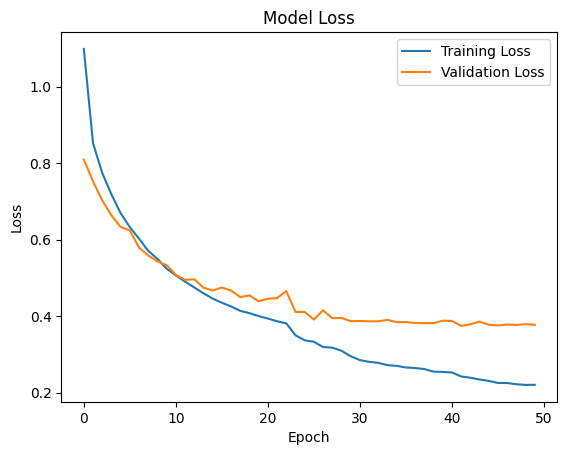

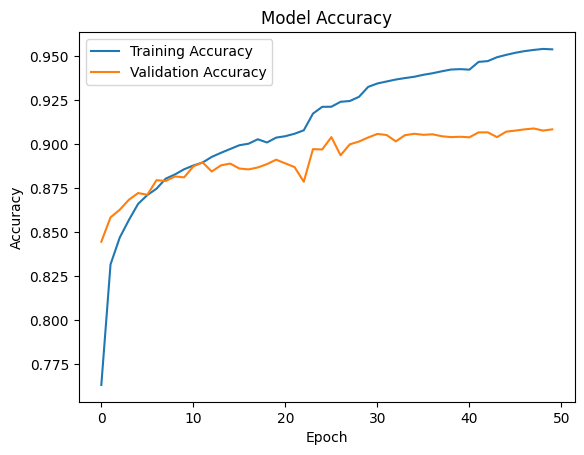

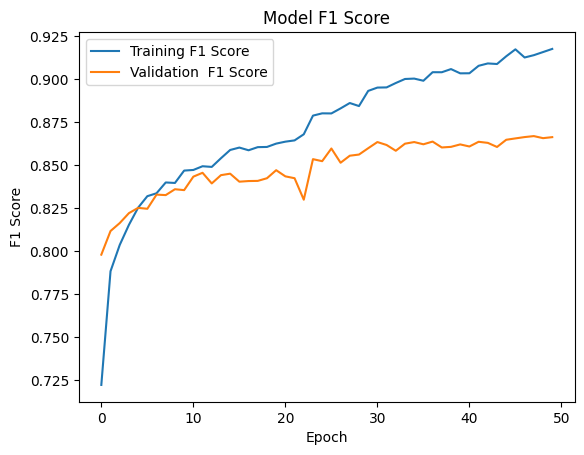

In [ ]:
import matplotlib.pyplot as plt

# 1) Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2) Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 3) Plot Training & Validation Accuracy
plt.plot(history.history['f1_score'], label='Training F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation  F1 Score')
plt.title('Model F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.show()




## Display model performance scores  
The performance metrics stored in the model_scores dictionary are converted into a pandas DataFrame for better readability. This DataFrame is displayed to show the detailed evaluation results for the model, including training and validation accuracy, precision, recall, F1 score, and the confusion matrix.


In [ ]:
df_scores = pd.DataFrame.from_dict(model_scores, orient='index')
df_scores

,training_accuracy,validation_accuracy,train_val_acc_diff,precision,recall,f1_score,confusion_matrix
DNN,0.97365,0.9066,0.06705,0.907069,0.9066,0.906696,"[[839, 0, 18, 20, 2, 1, 115, 0, 5, 0], [2, 985..."


## Save model scores and models  
The model performance scores are saved as a CSV file in the specified directory on Google Drive. If the directory does not exist, it is created. The file is saved with the name 'model_scores.csv'.  

Additionally, each model in the models dictionary is saved. If the model name is CNN, it is saved in .h5 format, which is a common format for Keras/TensorFlow models. The file is saved in the same directory, and the path is printed after each save operation.


In [ ]:
import os
import pandas as pd
import joblib

# Save the DataFrame as a CSV
save_dir = '/content/drive/MyDrive/BCU - MSc in AI/DL ASMT1/models'
os.makedirs(save_dir, exist_ok=True)  # create directory if not exists

csv_path = os.path.join(save_dir, 'model_scores.csv')
df_scores.to_csv(csv_path, index=True)
print(f"Saved model scores to: {csv_path}")

# Save each model in the models dict
for model_name, model_obj in models.items():
    if model_name == 'CNN':
        # best_model is your CNN (keras/tf model)
        h5_path = os.path.join(save_dir, 'CNN_model.h5')
        model_obj.save(h5_path)
        print(f"Saved CNN model to: {h5_path}")

Saved model scores to: /content/drive/MyDrive/BCU - MSc in AI/DL ASMT1/models/model_scores.csv


## Visualize sample predictions  
This code visualizes 9 sample predictions from the test set. The x_test images are reshaped back to their original 28x28 dimensions for visualization. For each image, the true label and predicted label are displayed as the title, with the color green for correct predictions and red for incorrect predictions. This provides a clear visual comparison of how well the model performs on individual test samples.


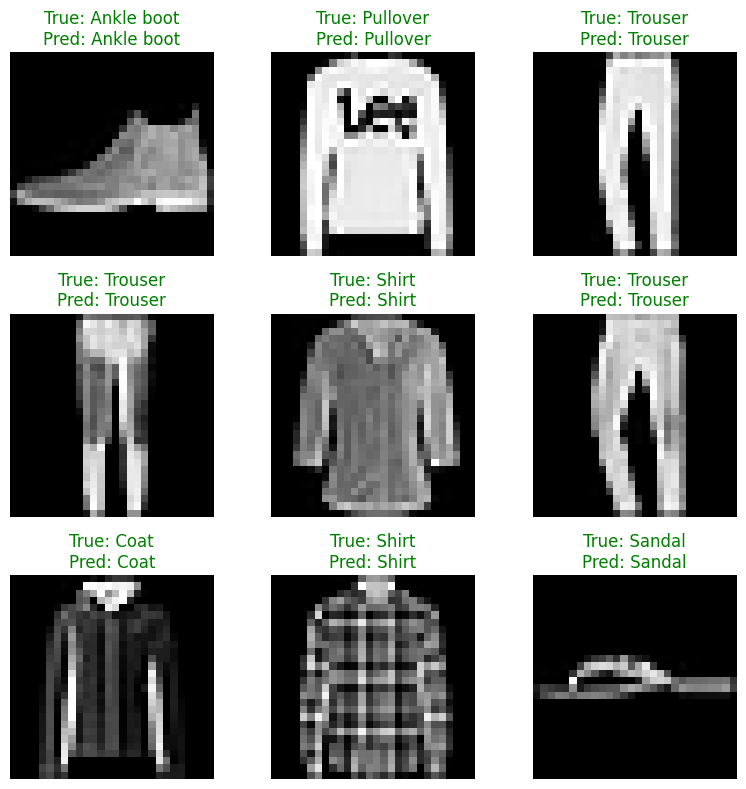

In [ ]:
y_train_pred = np.argmax(best_model.predict(x_train, verbose=0), axis=1)  # Shape: (60000,)
y_test_pred = np.argmax(best_model.predict(x_test, verbose=0), axis=1)


# Define label names for FashionMNIST
label_names = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
}

# Reshape x_test back to (28, 28) for visualization since it was flattened
x_test_images = x_test.reshape(-1, 28, 28)

# Plot 9 sample predictions from the test set
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(x_test_images[i], cmap='gray')
    true_label = label_names[y_test[i]]
    pred_label = label_names[y_test_pred[i]]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}",
                 color='green' if y_test[i] == y_test_pred[i] else 'red')
    ax.axis('off')
plt.tight_layout()
plt.show()